In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import beta
import scipy
from sklearn import preprocessing
from datetime import datetime
import datetime
from datetime import date, time, datetime

In [3]:
sr = pd.read_csv("/Users/Jeanne/Documents/personal/Auction Results/soldresults.csv")
sr.shape

(2568, 28)

In [4]:
alltop = sr.groupby(['Sire']).agg(['count','mean','median'])
alltop2 = alltop.sort_values(('price','mean'), ascending = False)
alltop3 = alltop2[alltop2[('price','count')] > 5]
alltop4 = alltop3['price'].head(10)
at = list(alltop4.index)
alltop4

,count,mean,median
Sire,,,
Quality Road,8,366500.000000,262500.0
American Pharoah,16,250750.000000,185000.0
Medaglia d'Oro,6,247500.000000,265000.0
Curlin,7,228571.428571,190000.0
Into Mischief,29,196068.965517,150000.0
Empire Maker,15,182233.333333,70000.0
Practical Joke,12,165000.000000,130000.0
Pioneerof the Nile,6,162000.000000,155000.0
Not This Time,37,158554.054054,75000.0


In [5]:
marchtop = sr[sr['OBSDate'] == '2021-03-01']
marchtop2 = marchtop.groupby(['Sire']).agg(['count','mean','median'])
marchtop3= marchtop2.sort_values(('price','mean'), ascending = False)
marchtop4 = marchtop3[marchtop3[('price','count')] > 2]
marchtop5 = marchtop4['price'].head(10)
mt = list(marchtop5.index)
marchtop5

,count,mean,median
Sire,,,
American Pharoah,5,430000.000000,550000.0
Into Mischief,7,307857.142857,300000.0
Violence,3,296666.666667,230000.0
Practical Joke,5,296000.000000,200000.0
Liam's Map,4,290000.000000,267500.0
Curlin,3,248333.333333,190000.0
Uncle Mo,3,235000.000000,100000.0
Munnings,5,220000.000000,65000.0
Union Rags,3,215000.000000,300000.0


In [6]:
ft = list(['Practical Joke','Unified','Gormley','American Freedom','Lord Nelson','Astern (AUS)','Connect','Mohaymen','Cupid'])
#removed classic empire: top 9
marchtopa = marchtop4.loc[ft]
marchtopa['price']

,count,mean,median
Sire,,,
Practical Joke,5,296000.000000,200000.0
Unified,6,199166.666667,97500.0
Gormley,7,153857.142857,67000.0
American Freedom,6,123666.666667,115000.0
Lord Nelson,7,118357.142857,70000.0
Astern (AUS),3,93333.333333,95000.0
Connect,11,83636.363636,57000.0
Mohaymen,7,73857.142857,50000.0
Cupid,7,66000.000000,47000.0


In [37]:
sire = sr.groupby(['Sire','OBSDate']).agg(['count','mean','median'])
tograph = sire['price'].sort_values('count',ascending=False)
tograph.head(10)

count           mean   median
Sire              OBSDate                                  
Not This Time     2020-04-01     20  205450.000000  85000.0
Uncaptured        2021-01-01     17    6647.058824   5500.0
                  2020-10-01     16   27906.250000  15000.0
Exaggerator       2020-04-01     16   47625.000000  41000.0
Constitution      2020-04-01     15  100866.666667  67000.0
California Chrome 2020-04-01     15  104300.000000  35000.0
Speightster       2020-04-01     14   64571.428571  57500.0
Brethren          2021-01-01     13    2253.846154   1500.0
Frosted           2020-04-01     12  100750.000000  97500.0
Munnings          2020-04-01     12  109333.333333  92500.0

In [ ]:
dfmean = 

In [38]:
tgat = tograph.loc[at]
tgmt = tograph.loc[mt]
tgft = tograph.loc[ft]

tgft.reset_index(inplace=True, level = ['OBSDate'])
tgft.reset_index(inplace=True, level = ['Sire'])
tgft = tgft.drop('count',1)
tgft = tgft.drop('median',1)

tgmt.reset_index(inplace=True, level = ['OBSDate'])
tgmt.reset_index(inplace=True, level = ['Sire'])
tgmt = tgmt.drop('count',1)
tgmt = tgmt.drop('median',1)

tgat.reset_index(inplace=True, level = ['OBSDate'])
tgat.reset_index(inplace=True, level = ['Sire'])
tgat = tgat.drop('count',1)
tgat = tgat.drop('median',1)

tog = tograph
tog.reset_index(inplace=True, level = ['OBSDate'])
tog.reset_index(inplace=True, level = ['Sire'])
tog = tog.drop('count',1)
tog = tog.drop('median',1)

p = tgft.pivot(index = 'OBSDate', columns = 'Sire',values = 'mean')
p.reset_index(inplace=True, level = ['OBSDate'])

pa = tgat.pivot(index = 'OBSDate', columns = 'Sire',values = 'mean')
pa.reset_index(inplace=True, level = ['OBSDate'])

pm = tgmt.pivot(index = 'OBSDate', columns = 'Sire',values = 'mean')
pm.reset_index(inplace=True, level = ['OBSDate'])

tg = tog.pivot(index = 'OBSDate', columns = 'Sire',values = 'mean')
tg.reset_index(inplace=True, level = ['OBSDate'])

#pa = pa.drop(['Curlin','Medaglia d\'Oro','Not This Time','Pioneerof the Nile','Quality Road'],1)
#pm = pm.drop(['Curlin','Liam\'s Map', 'Munnings', 'Uncle Mo', 'Violence'],1)

tg

Sire,OBSDate,A.P. Indy,Adios Charlie,Admiral Kitten,Aikenite,Air Force Blue,Aldebaran,Algorithms,Almasty,Alpha,...,Wicked Strong,Wilburn,Wildcat Heir,Wildcat Red,Will Take Charge,Winslow Homer,With Distinction,Wrote (IRE),Yes It's True,Zoffany (IRE)
0,2020-03-01,NaN,12000.0,15000.0,NaN,145500.000000,NaN,NaN,NaN,NaN,...,24800.000000,NaN,NaN,NaN,20000.000000,NaN,NaN,NaN,NaN,NaN
1,2020-04-01,NaN,NaN,NaN,NaN,88409.090909,NaN,75000.0,NaN,52000.0,...,25800.000000,NaN,NaN,NaN,25000.000000,NaN,NaN,NaN,NaN,120000.0
2,2020-07-01,NaN,9750.0,NaN,4000.0,38200.000000,NaN,NaN,NaN,NaN,...,6600.000000,NaN,NaN,NaN,60000.000000,5750.0,8000.0,4000.0,NaN,NaN
3,2020-10-01,NaN,18000.0,NaN,NaN,38750.000000,NaN,NaN,7000.0,NaN,...,6000.000000,1000.0,NaN,180000.0,19333.333333,NaN,NaN,NaN,NaN,NaN
4,2021-01-01,5000.0,4000.0,10000.0,NaN,7000.000000,4500.0,NaN,NaN,NaN,...,6666.666667,NaN,1000.0,NaN,5750.000000,3500.0,NaN,NaN,2733.333333,NaN
5,2021-03-01,NaN,NaN,NaN,NaN,33500.000000,NaN,NaN,NaN,NaN,...,9000.000000,NaN,NaN,NaN,30000.000000,NaN,NaN,NaN,NaN,NaN


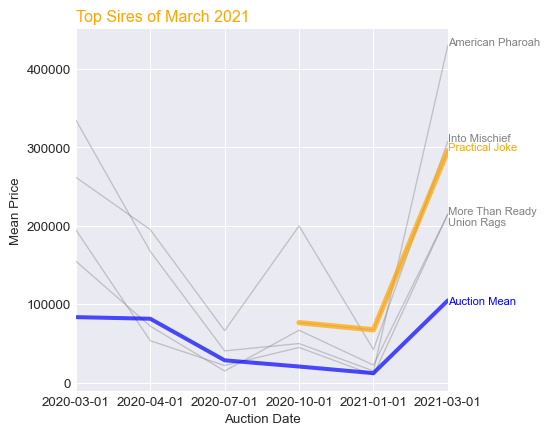

In [54]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Change the style of plot
plt.style.use('seaborn-darkgrid')

# set figure size
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# plot multiple lines
for column in pm.drop('OBSDate', axis=1):
    plt.plot(pm['OBSDate'], pm[column], marker='', color='grey', linewidth=1, alpha=0.4)

# Now re do the interesting curve, but biger with distinct color
plt.plot(pm['OBSDate'], pm['Practical Joke'], marker='', color='orange', linewidth=4, alpha=0.7)
plt.plot(pm['OBSDate'], tg.mean(1), marker='', color='blue', linewidth=3, alpha=0.7)
 
# Change x axis limit
plt.xlim(0,5)
 
# Let's annotate the plot
num=0
for i in pm.values[5][1:]:
    num+=1
    name=list(pm)[num]
    if name != 'Practical Joke' and name != 'Union Rags':
        plt.text(5, i, name, horizontalalignment='left', size='small', color='grey')

# And add a special annotation for the group we are interested in
plt.text(5, 296000, 'Practical Joke', horizontalalignment='left', size='small', color='orange')
plt.text(5, 100000, 'Auction Mean', horizontalalignment='left', size='small', color='blue')
plt.text(5, 200000, 'Union Rags', horizontalalignment='left', size='small', color='grey')
 
# Add titles
plt.title("Top Sires of March 2021", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Auction Date")
plt.ylabel("Mean Price")

# Show the graph
plt.show()

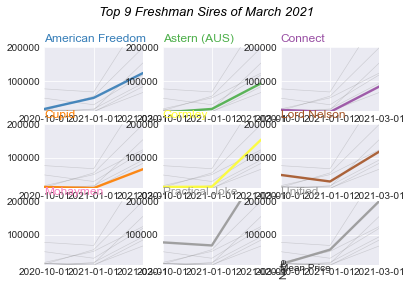

In [11]:
# Initialize the figure style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in p.drop('OBSDate', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,3, num)
 
    # plot every group, but discrete
    for v in p.drop('OBSDate', axis=1):
        plt.plot(p['OBSDate'], p[v], marker='', color='grey', linewidth=0.6, alpha=0.3)
 
    # Plot the lineplot
    plt.plot(p['OBSDate'], p[column], marker='', color=palette(num), linewidth=2.4, alpha=0.9, label=column)
 
    # Same limits for every chart
    plt.xlim(0,2)
    plt.ylim(10000,200000)
 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )

# general title
plt.suptitle("Top 9 Freshman Sires of March 2021", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
 
# Axis titles
plt.text(0.5, 0.02, 'Mean Price', ha='center', va='center')
plt.text(0.06, 0.5, 'Mean Price', ha='center', va='center', rotation='vertical')

# Show the graph
plt.show()